In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
!git clone https://github.com/Compfest-AIdea/machine-learning.git

Cloning into 'machine-learning'...
remote: Enumerating objects: 364, done.
remote: Counting objects: 100% (364/364), done.
remote: Compressing objects: 100% (362/362), done.
remote: Total 364 (delta 11), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (364/364), 4.53 MiB | 9.24 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [3]:
df = pd.read_csv("/content/machine-learning/Dataset/Dataset-Tabular/hair_loss_selected.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   hair_loss               396 non-null    int64
 1   stay_up_late            396 non-null    int64
 2   coffee_consumed         396 non-null    int64
 3   brain_working_duration  396 non-null    int64
 4   pressure_level          396 non-null    int64
 5   stress_level            396 non-null    int64
 6   swimming                396 non-null    int64
 7   hair_washing            396 non-null    int64
 8   dandruff                396 non-null    int64
dtypes: int64(9)
memory usage: 28.0 KB


# Data Augmentation

In [5]:
df.head()

,hair_loss,stay_up_late,coffee_consumed,brain_working_duration,pressure_level,stress_level,swimming,hair_washing,dandruff
0,0,2,0,1,0,0,0,0,0
1,0,0,0,3,0,0,0,0,0
2,1,3,1,0,1,1,1,1,1
3,0,2,0,1,0,0,0,0,0
4,0,2,0,1,0,0,0,0,0


In [6]:
df['hair_loss'].value_counts()

0    166
1    166
2     42
3     22
Name: hair_loss, dtype: int64

In [7]:
df_major = df[(df['hair_loss']==0) | (df['hair_loss']==1)]
df_dua = df[(df['hair_loss']==2)]
df_tiga = df[(df['hair_loss']==3)]

In [8]:
from sklearn.utils import resample

df_dua_up = resample(df_dua, replace = True, n_samples = 50, random_state = 42)
df_tiga_up = resample(df_tiga, replace = True, n_samples = 50, random_state = 42)
df_aug = pd.concat([df_major, df_dua_up, df_tiga_up]).reset_index(drop=True)

In [9]:
df_aug['hair_loss'].value_counts()

0    166
1    166
2     50
3     50
Name: hair_loss, dtype: int64

In [10]:
df_aug

,hair_loss,stay_up_late,coffee_consumed,brain_working_duration,pressure_level,stress_level,swimming,hair_washing,dandruff
0,0,2,0,1,0,0,0,0,0
1,0,0,0,3,0,0,0,0,0
2,1,3,1,0,1,1,1,1,1
3,0,2,0,1,0,0,0,0,0
4,0,2,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
427,3,8,8,18,3,3,3,3,3
428,3,4,6,13,3,3,3,3,3
429,3,6,7,16,3,3,3,3,3
430,3,6,7,16,3,3,3,3,3


In [11]:
df_aug.to_csv("/content/machine-learning/Dataset/Dataset-Tabular/hair_loss_aug.csv", index = False)

In [12]:
Y = df_aug['hair_loss']

In [13]:
Y.unique()

array([0, 1, 2, 3])

In [14]:
#hair_grease, coffee_consumed, pressure_level, stress_level, swimming, hair_washing, dandruff
X = df_aug.loc[:, df.columns != 'hair_loss']

In [15]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, random_state = 42, train_size=0.7)

In [16]:
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (302, 8)
x_test:  (130, 8)
y_train:  (302,)
y_test:  (130,)


In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Model Development

In [18]:
def create_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1])),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(4, activation='softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
  return model

In [19]:
model = create_model()
history = model.fit(x_train, y_train,epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
10/10 [==============================] - 3s 94ms/step - loss: 1.2695 - accuracy: 0.5265 - val_loss: 1.2438 - val_accuracy: 0.6615
Epoch 2/50
10/10 [==============================] - 0s 31ms/step - loss: 1.1698 - accuracy: 0.7219 - val_loss: 1.1597 - val_accuracy: 0.7385
Epoch 3/50
10/10 [==============================] - 0s 23ms/step - loss: 1.0867 - accuracy: 0.7450 - val_loss: 1.0928 - val_accuracy: 0.7462
Epoch 4/50
10/10 [==============================] - 0s 20ms/step - loss: 1.0172 - accuracy: 0.7682 - val_loss: 1.0217 - val_accuracy: 0.7385
Epoch 5/50
10/10 [==============================] - 0s 10ms/step - loss: 0.9484 - accuracy: 0.7881 - val_loss: 0.9552 - val_accuracy: 0.8000
Epoch 6/50
10/10 [==============================] - 0s 21ms/step - loss: 0.8813 - accuracy: 0.8113 - val_loss: 0.8786 - val_accuracy: 0.8000
Epoch 7/50
10/10 [==============================] - 0s 27ms/step - loss: 0.8170 - accuracy: 0.8212 - val_loss: 0.8148 - val_accuracy: 0.8154
Epoch 8/50
10

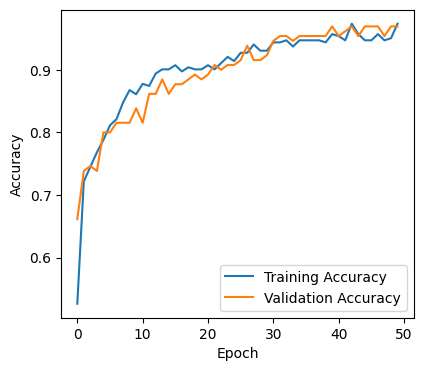

In [20]:
# Plot akurasi dan loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [21]:
saved_model_path = "/content/machine-learning/Models/hairloss_model.h5"
model.save(saved_model_path)